<a href="https://colab.research.google.com/github/KILjungjoon/Sentiment-Analysis/blob/master/Presentation_20221118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction

1. This research is for

><p style="font-size:10px">"A comparative study of the effects of COVID-19 on the emotions of Koreans and Taiwanese : 
through the analysis of popular song lyrics"</p>


2. Purpose of the Study

>This study focuses on how people's positive and negative sentiment caused by COVID-19 during the Pandemic. 


3. Methods
* The most important analyses in this study are sentiment analysis and time series analysis. Sentiment analysis tools include machine learning models created by pre-trained movie reviews or Wikipedia texts, and sentiment dictionaries. The sentiment analysis model is a tool for determining positive or negative polarity, while the sentiment dictionary is a dataset in which vocabularies belonging to each sentiment category, such as joy and sadness.

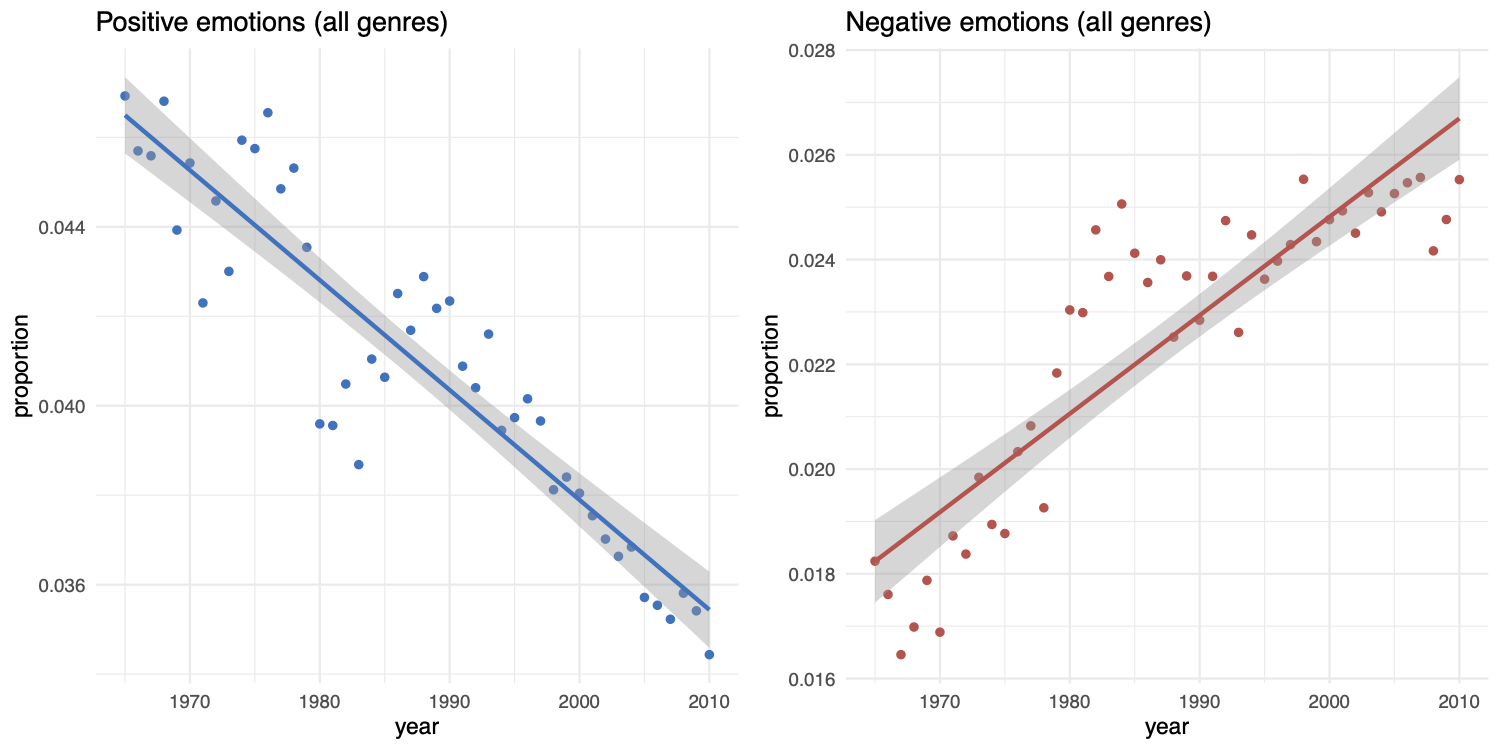

> * NLP
>> - Korean Tokenizer : Kiwi Libruary<br> 
>> -Taiwanese Tokenizer : CKIP by SINICA
> * Sentiment Analysis
>> - KNU Sentiment Dictionary for Korean<br>
>> - Jieba Sentiment Classifier for Chinese
> * Time Series Analysis

4. Data

> * K-pop data from [Melon Chart](https://www.melon.com/chart/index.htm) and [Circle Chart](https://circlechart.kr/)
> * T-pop data from [KKBOX](https://kma.kkbox.com/charts/hourly?terr=tw&lang=tc)
> * COVID-19 data from [Our World in Data](https://ourworldindata.org/coronavirus)

5. Research Process

>|  Data  | →|Pre-process| →|Corpus| →|Analysis| →|Conclusion|
|--------|---|------------|---|------|---|--------|---|----------| 
|Crawling|   |      NLP   |   |Tokenizer||Sentiment||
|        |   |            |   |         ||Time Series||

 # 2.Structure of Data

 ### 1) K-pop data

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/AIclub/SongCrawler/songs_raw.xlsx')
print(df.shape)
df1=df.drop('Unnamed: 0', axis=1)
df1.head()

(700, 9)


,year,rank,title,song id,singer,singer id,genre,lyrics
0,2015,1,뱅뱅뱅 (BANG BANG BANG),5719286,BIGBANG (빅뱅),198094,랩/힙합,난 깨어나 까만 밤과 함께\n다 들어와 담엔 누구 차례\n한 치 앞도 볼 수 없는 ...
1,2015,2,같은 시간 속의 너,5576417,나얼,3959,R&amp;B/Soul,꼭 그러지 않아도\n충분히 널 이해할 수 있어\n다른 사람 곁에 서 있는 니 모습이...
2,2015,3,꺼내 먹어요,5702706,Zion.T,537920,R&amp;B/Soul,안녕\n쉽지 않죠 바쁘죠\n왜 이렇게 까지\n해야 하나 싶죠\n바라는 게\n더럽게 ...
3,2015,4,이럴거면 그러지말지 (Feat. Young K),5704397,백아연,646173,발라드,궁금해서 잠이 안 와\n그때 왜 그랬어\n구차해도 묻고 싶어\n그때 난 뭐였어\n나...
4,2015,5,위잉위잉,5385974,혁오 (HYUKOH),785589,"인디음악, 록/메탈",비틀비틀 걸어가는 나의 다리\n오늘도 의미없는\n또 하루가 흘러가죠\n사랑도 끼리끼...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


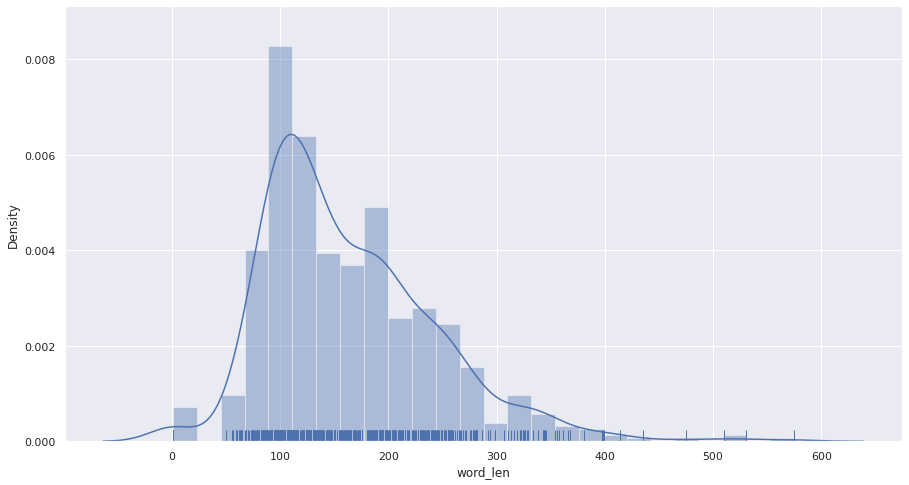

In [ ]:
# the length of lyrics
df1['word_len']=df1['lyrics'].str.count(" ")+1

import seaborn as sns 
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df1['word_len'], rug=True)

### 2) T-pop data

In [3]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/A Comparative Study on K-pop and T-pop in the Covid-19 Era/tpopSong_new.xlsx')
print(df.shape)
df2=df.drop('songUrl', axis=1)
df2.head(10)

(23373, 6)


,date,rank,artist,songName,lyric
0,2015-01-01,1,林俊傑 (JJ Lin),可惜沒如果,假如把犯得起的錯 能錯的都錯過 應該還來得及去悔過 假如沒把一切說破 那一場小風波 ...
1,2015-01-01,2,周杰倫 (Jay Chou),算什麼男人,親吻你的手 還靠著你的頭 讓你躺胸口 那個人已不是我 這些平常的舉動現在叫做難過 ...
2,2015-01-01,3,筷子兄弟,小蘋果,我種下一顆種子 終於長出了果實 今天是個偉大日子 摘下星星送給你 拽下月亮送給你 讓太陽每天...
3,2015-01-01,4,曾沛慈 (Pets Tseng),不過失去了一點點 - 八大綜合台戲劇<終極惡女>片尾曲,我心愛的你 我是真的好想你 好想抱一抱你 我不在身邊 要對自己好一點 別再如此傷悲 我們的...
4,2015-01-01,5,楊丞琳 (Rainie Yang),失憶的金魚,我的簡訊在你手機裡面哭 你不碰 它孤獨 我像一隻金魚你看不到淚珠 只有那盆水才清楚 ...
5,2015-01-01,6,周杰倫 (Jay Chou),聽爸爸的話,你聽爸爸的話 說我不是個好東西 送給你的花 不配放在你家花瓶裡 他要我越走越遠越好 不...
6,2015-01-01,7,周杰倫 (Jay Chou),聽見下雨的聲音,竹籬上 停留著 蜻蜓 玻璃瓶裡插滿 小小 森林 青春 嫩綠的很 鮮明 百葉窗 折射的...
7,2015-01-01,8,楊丞琳 (Rainie Yang),點水 (Dian Shui),脫下自己蓋上你 離開心的舒適圈 我願意主動被你選擇 你卻不說話 準備漣漪等著你 降低坦白的...
8,2015-01-01,9,梁靜茹 (Fish Leong),小小孩（演唱：梁靜茹）【電影「極光之愛」極光主題曲】,Try try try to cry Cry cry cry to try 想哭 就哭出來...
9,2015-01-01,10,周杰倫 (Jay Chou),鞋子特大號,巨砲：喂？ 杰倫：喂 巨砲喔？ 巨砲：欸欸 杰倫：欸 你有沒有看過卓別林？ 巨砲...


In [13]:
# the length of lyrics
df2['word_len']=df2['lyric'].apply(lambda x: len(x.split()) if type(x) == str else x)
df2

,date,rank,artist,songName,lyric,word_len
0,2015-01-01,1,林俊傑 (JJ Lin),可惜沒如果,假如把犯得起的錯 能錯的都錯過 應該還來得及去悔過 假如沒把一切說破 那一場小風波 ...,73.0
1,2015-01-01,2,周杰倫 (Jay Chou),算什麼男人,親吻你的手 還靠著你的頭 讓你躺胸口 那個人已不是我 這些平常的舉動現在叫做難過 ...,66.0
2,2015-01-01,3,筷子兄弟,小蘋果,我種下一顆種子 終於長出了果實 今天是個偉大日子 摘下星星送給你 拽下月亮送給你 讓太陽每天...,55.0
3,2015-01-01,4,曾沛慈 (Pets Tseng),不過失去了一點點 - 八大綜合台戲劇<終極惡女>片尾曲,我心愛的你 我是真的好想你 好想抱一抱你 我不在身邊 要對自己好一點 別再如此傷悲 我們的...,58.0
4,2015-01-01,5,楊丞琳 (Rainie Yang),失憶的金魚,我的簡訊在你手機裡面哭 你不碰 它孤獨 我像一隻金魚你看不到淚珠 只有那盆水才清楚 ...,75.0
...,...,...,...,...,...,...
23368,2022-10-27,45,莊心妍,再沒見你的身份,一個人 又失眠到清晨 城市都熄了燈 臉上還有淚痕 房間裡 全是你的回憶 回憶像把刀子 刺進我...,41.0
23369,2022-10-27,46,Bolly,不完美女孩,每個人都有某種病 壞的得體就是真理 Be your self我就特立獨行 朋友們都說我還行 ...,127.0
23370,2022-10-27,47,Juice Boy,意猶未盡 - Acoustic Version,Take my heart away from this boring life The w...,155.0
23371,2022-10-27,48,琳誼 Ring,蚵仔麵線 (香菜加味版),蚵仔跟麵線 一個愛藏水 一個愛日頭曬乾 生活不相同 想不到結果變得這麼密 親像你跟我 本來不...,46.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


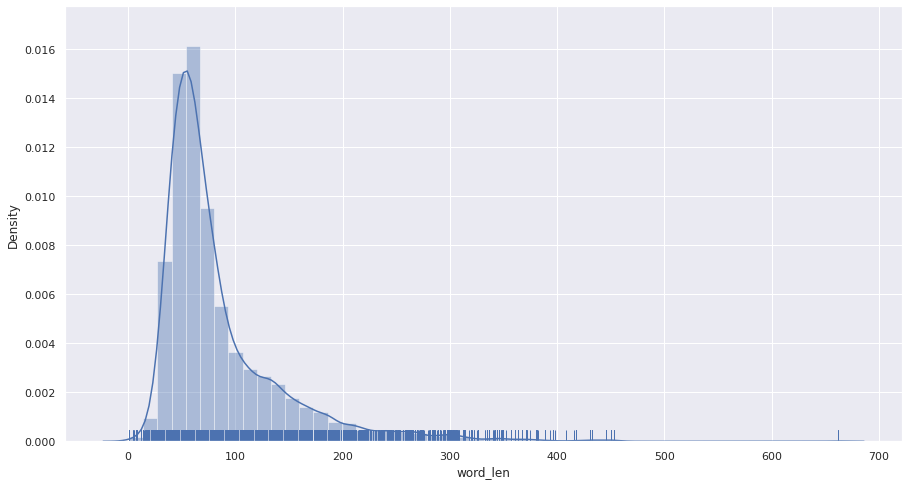

In [14]:
import seaborn as sns 
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df2['word_len'], rug=True)

### 3) COVID-19 data

*** Confirmed Case Data during 2020~2021 **
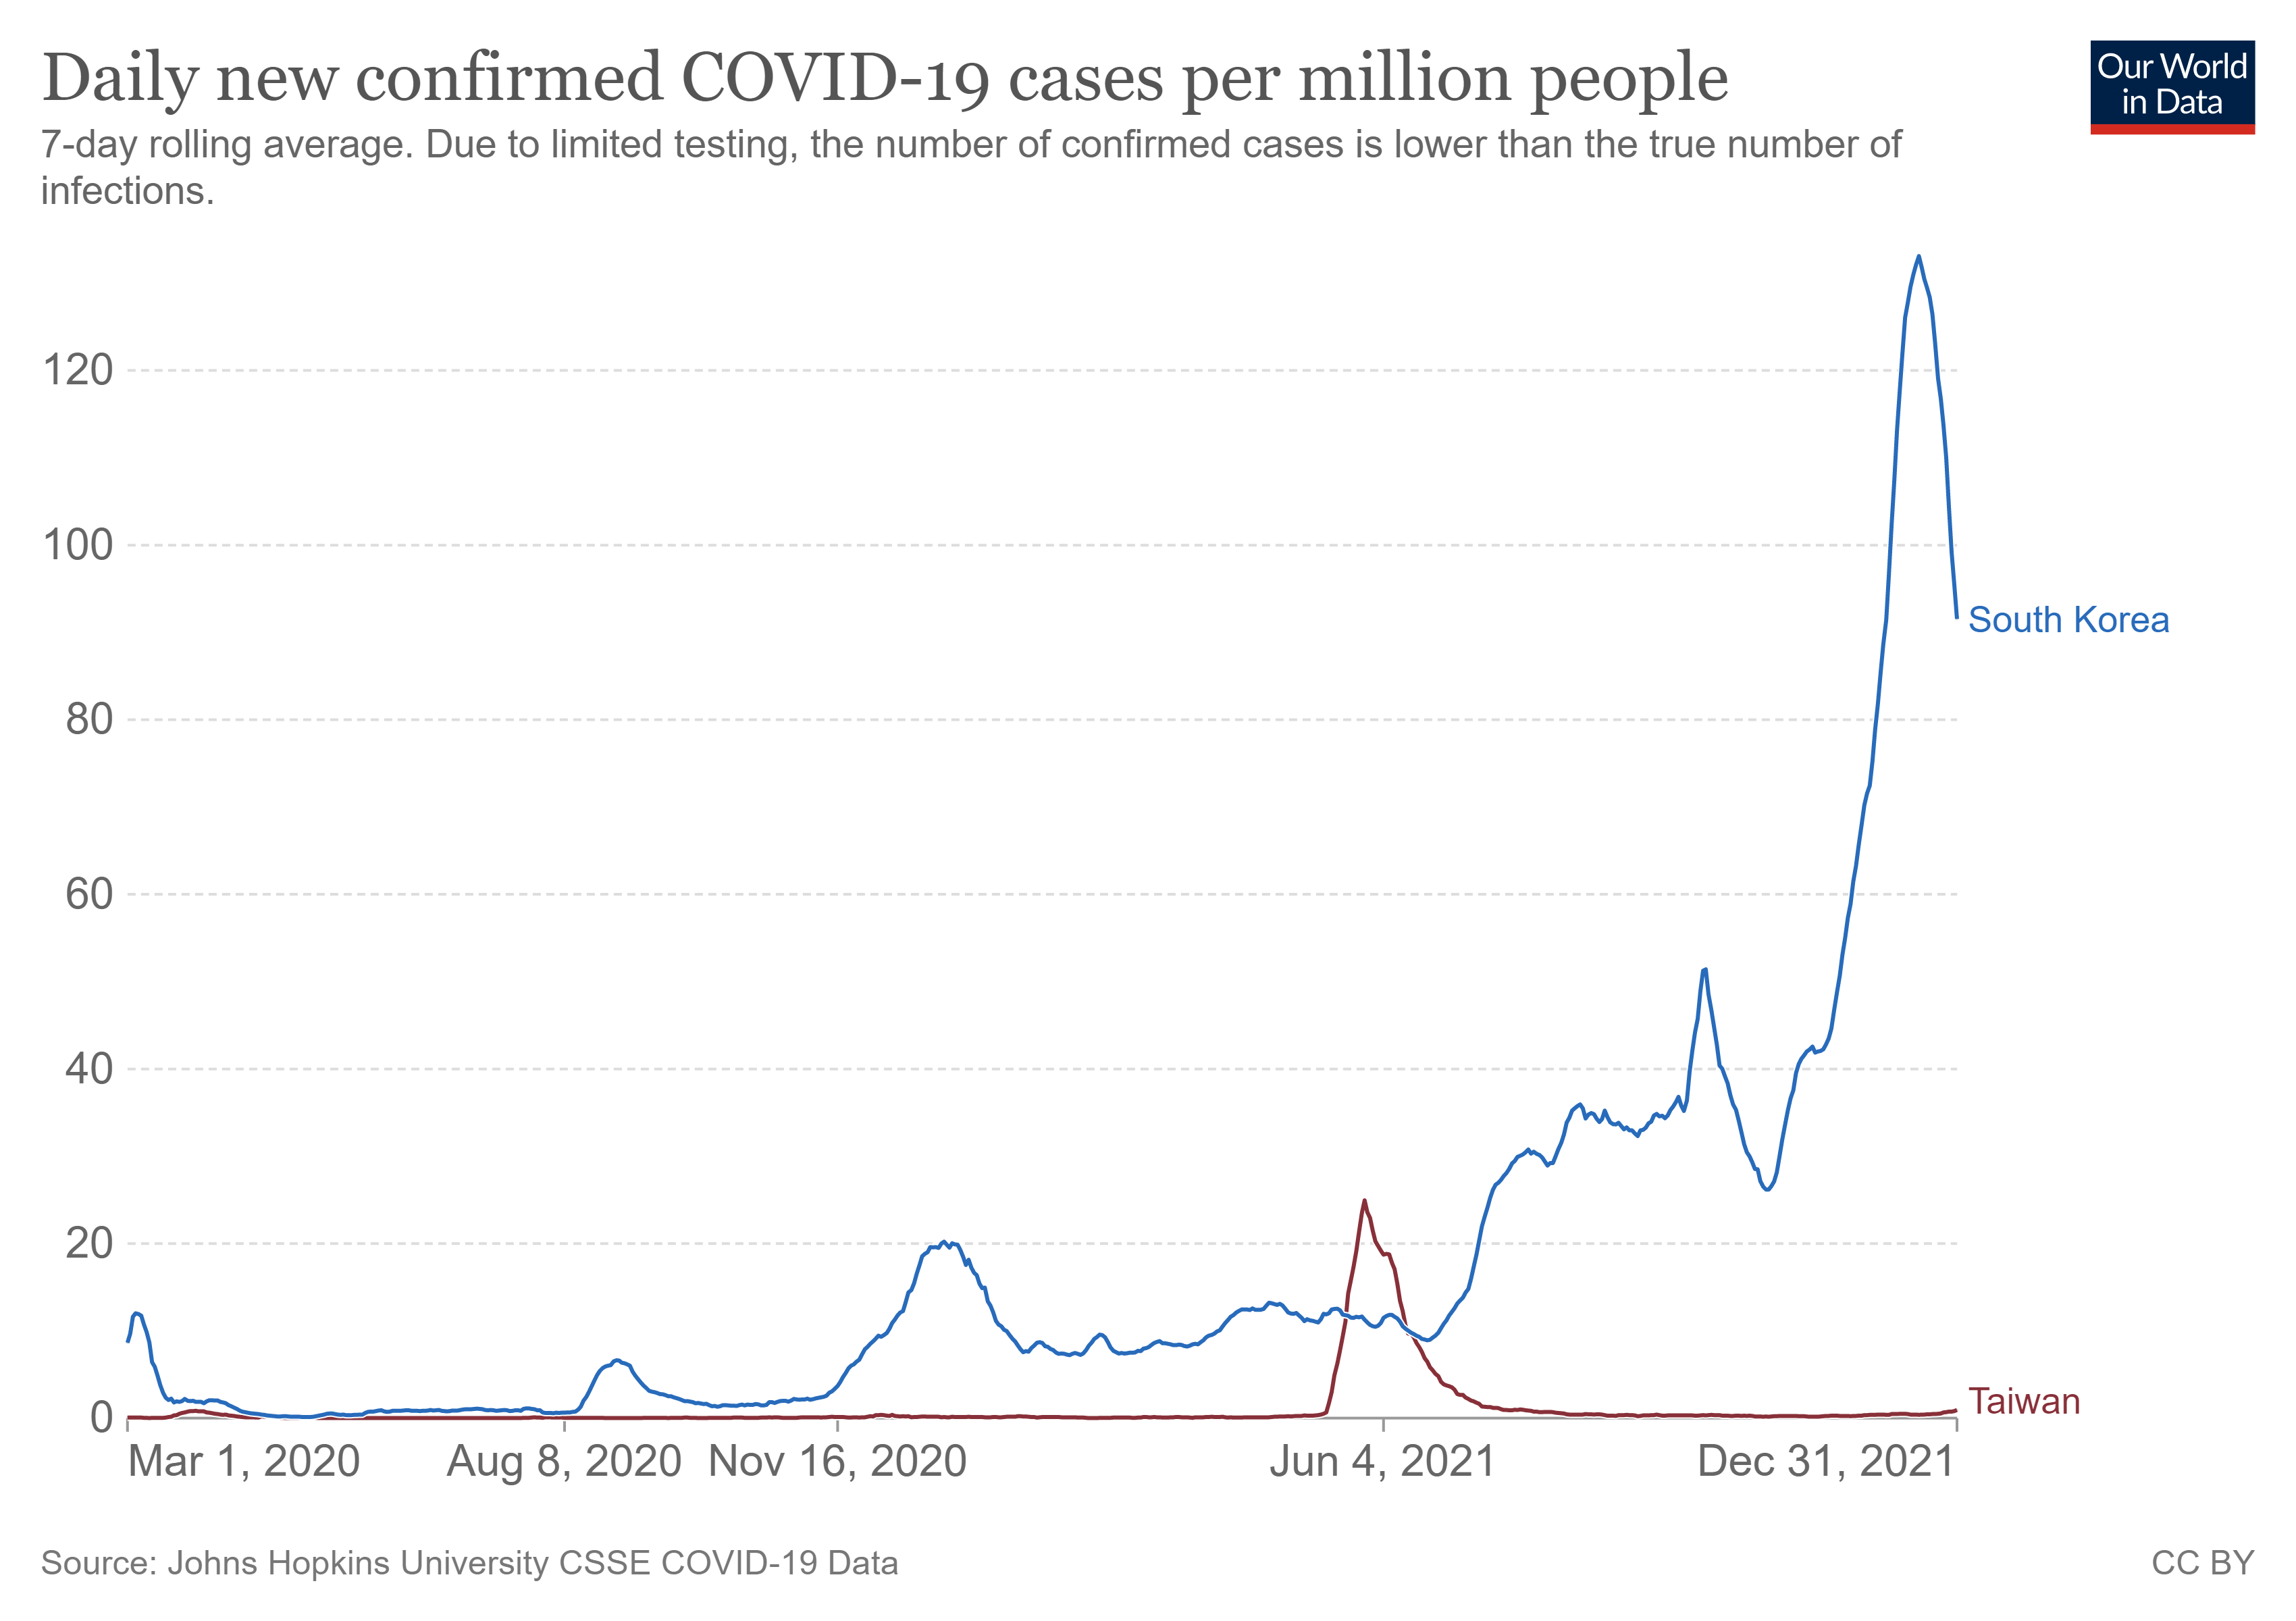